In [1]:
!mkdir data
!mkdir data/images
!mkdir queries
!wget -nc --directory-prefix=data/ "https://storage.googleapis.com/qdrant-examples/amazon-product-dataset-2020.zip"

--2024-02-02 14:18:36--  https://storage.googleapis.com/qdrant-examples/amazon-product-dataset-2020.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5627576 (5.4M) [application/zip]
Saving to: ‘data/amazon-product-dataset-2020.zip’

amazon-product-data 100%[===================>]   5.37M  4.56MB/s    in 1.2s    

2024-02-02 14:18:38 (4.56 MB/s) - ‘data/amazon-product-dataset-2020.zip’ saved [5627576/5627576]



In [2]:
!unzip data/amazon-product-dataset-2020.zip

Archive:  data/amazon-product-dataset-2020.zip
  inflating: home/sdf/marketing_sample_for_amazon_com-ecommerce__20200101_20200131__10k_data.csv  


In [44]:
import pandas as pd

# dataset_df = pd.read_csv("home/sdf/marketing_sample_for_amazon_com-ecommerce__20200101_20200131__10k_data.csv")
percent_to_read = 0.08
file_path = "home/sdf/marketing_sample_for_amazon_com-ecommerce__20200101_20200131__10k_data.csv"
dataset_df = pd.read_csv(file_path, nrows=int(percent_to_read * pd.read_csv(file_path).shape[0]))

dataset_df.columns.tolist()

['Uniq Id',
 'Product Name',
 'Brand Name',
 'Asin',
 'Category',
 'Upc Ean Code',
 'List Price',
 'Selling Price',
 'Quantity',
 'Model Number',
 'About Product',
 'Product Specification',
 'Technical Details',
 'Shipping Weight',
 'Product Dimensions',
 'Image',
 'Variants',
 'Sku',
 'Product Url',
 'Stock',
 'Product Details',
 'Dimensions',
 'Color',
 'Ingredients',
 'Direction To Use',
 'Is Amazon Seller',
 'Size Quantity Variant',
 'Product Description']

In [45]:
dataset_df["Image"] = dataset_df["Image"].map(lambda x: x.split("|")[:-1])

In [46]:
dataset_df = dataset_df.explode("Image").dropna(subset=["Image"])

In [47]:
dataset_df.iloc[0]["Image"]

'https://images-na.ssl-images-amazon.com/images/I/51j3fPQTQkL.jpg'

In [49]:
dataset_df['Image'].shape

(2788,)

In [1]:
from transformers import pipeline
import requests
from PIL import Image
from io import BytesIO
import numpy as np
import pandas as pd

2024-02-03 17:38:32.312255: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 17:38:32.312362: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 17:38:32.386792: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-03 17:38:32.554650: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-03 17:38:38.037093: W tensorflow/compiler/tf2

In [7]:
# Create an empty DataFrame with columns 'image_url' and 'caption'
main_df = pd.DataFrame(columns=['Image', 'caption'])

# Display the empty DataFrame
display(main_df)

,Image,caption


In [8]:
main_df["Image"] = dataset_df["Image"]

In [ ]:
display(main_df)

In [10]:
main_df.iloc[0]["Image"]

'https://images-na.ssl-images-amazon.com/images/I/51j3fPQTQkL.jpg'

In [11]:
captioner = pipeline("image-to-text",model="Salesforce/blip-image-captioning-base")
processed_images_count = 0
caption_count = 0

def get_caption(url):
    global caption_count
    try:
      result_list = captioner(url)

      if result_list:
          generated_text = result_list[0].get('generated_text', '')
          caption_count += 1
          print(caption_count, " =========== ", url, " === ", generated_text)
          return generated_textstreamlit
      else:
          return None
    except:
      print(url)
      return None



def check_valid_URLs(image_URL):
    global processed_images_count
    response = requests.get(image_URL)
    # Image.open(BytesIO(response.content))
    # print(Image.open(BytesIO(response.content)))
    processed_images_count += 1
    print(processed_images_count)
    if response.status_code == 200:
      return True
    else:
      return False


# def process_row(row):
#     row['is_valid'] = check_valid_URLs(row['Image'])
#     return row

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

In [12]:
# import multiprocessing

# cores = multiprocessing.cpu_count() # Count the number of cores in a computer
# cores

In [ ]:
main_df["is_valid"] = main_df["Image"].apply(check_valid_URLs)
main_df = main_df[main_df["is_valid"]==True]
main_df.head()


In [ ]:
main_df["caption"] = main_df["Image"].apply(get_caption)
main_df.head()

In [14]:
main_df.to_csv('main_df_csv.csv', header=True, index=False)

### Note
Moving to local system to run docker and some pre-processing

In [2]:
import pandas as pd

main_df = pd.read_csv("main_df_kaggle.csv")

In [3]:
main_df = main_df.dropna(subset=['caption'])

In [4]:
main_df = main_df.reset_index(drop=True)

### Data Exploration

Average Caption Length: 9.530215827338129
Maximum Caption Length: 19
Minimum Caption Length: 2
Vocabulary Size: 2123
Most Common Words:
a         3102
the       1191
with      1155
and        728
fisher     669
of         551
toy        384
on         358
white      313
in         272
Name: count, dtype: int64
Number of Unique Image-Caption Pairs: 2696
Number of Images Associated with Multiple Captions: 41


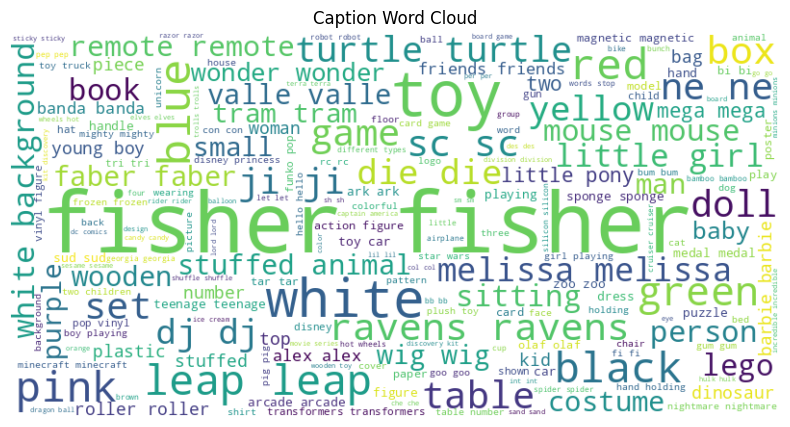

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have a DataFrame named 'main_df' with columns 'caption' and 'LocalImage'

# Caption Statistics
average_caption_length = main_df['caption'].apply(lambda x: len(x.split())).mean()
max_caption_length = main_df['caption'].apply(lambda x: len(x.split())).max()
min_caption_length = main_df['caption'].apply(lambda x: len(x.split())).min()

print(f"Average Caption Length: {average_caption_length}")
print(f"Maximum Caption Length: {max_caption_length}")
print(f"Minimum Caption Length: {min_caption_length}")

# Caption Content
vocabulary_size = len(set(' '.join(main_df['caption']).split()))
most_common_words = pd.Series(' '.join(main_df['caption']).split()).value_counts().head(10)

print(f"Vocabulary Size: {vocabulary_size}")
print("Most Common Words:")
print(most_common_words)

# Caption and Image Relationships
unique_image_caption_pairs = main_df[['image_url', 'caption']].drop_duplicates()
image_repeated = main_df.duplicated(subset='image_url', keep=False)
print(f"Number of Unique Image-Caption Pairs: {len(unique_image_caption_pairs)}")
print(f"Number of Images Associated with Multiple Captions: {main_df[image_repeated]['image_url'].nunique()}")

# Visualization
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(main_df['caption']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Caption Word Cloud')
plt.show()


### Download Image to local System

In [13]:
from typing import Optional
import numpy as np
import urllib
import os

def download_file(url: str) -> Optional[str]:
    basename = os.path.basename(url)
    target_path = f"./data/images/{basename}"
    if not os.path.exists(target_path):
        try:
            urllib.request.urlretrieve(url, target_path)
        except urllib.error.HTTPError:
            return None
    return target_path

In [14]:
main_df["LocalImage"] = main_df["image_url"].map(download_file).replace({None: np.nan})
main_df = main_df.dropna(subset=["LocalImage"])

In [15]:
main_df.head()

,image_url,caption,IsValid,LocalImage
0,https://images-na.ssl-images-amazon.com/images...,a skateboard with a black and white design,True,./data/images/51j3fPQTQkL.jpg
1,https://images-na.ssl-images-amazon.com/images...,a skate with wheels and wheels,True,./data/images/31hKM3cSoSL.jpg
2,https://images-na.ssl-images-amazon.com/images...,a man riding a skateboard on a bridge,True,./data/images/51WlHdwghfL.jpg
3,https://images-na.ssl-images-amazon.com/images...,a skateboard sitting on the rocks near the water,True,./data/images/51FsyLRBzwL.jpg
4,https://images-na.ssl-images-amazon.com/images...,a set of electronic toys with instructions and...,True,./data/images/51M0KnJxjKL.jpg


In [17]:
main_df.to_csv("main_df_with_Local_Images.csv")

### Qdrant

In [18]:
from sentence_transformers import SentenceTransformer
from qdrant_client import models, QdrantClient

encoder = SentenceTransformer("all-MiniLM-L6-v2")

In [20]:
!docker run -d -p "6333:6333" -p "6334:6334" --name "text_image_search" qdrant/qdrant:v1.3.0

fc429adb3c2735b1bb2e11beec25acf0287883f11dca6af076dd8a717879416b


In [21]:
try:
    client = QdrantClient("localhost")
    collections = client.get_collections()
except Exception:
    # Docker is unavailable in Google Colab so we switch to local
    # mode available in Python SDK
    client = QdrantClient(":memory:")
    collections = client.get_collections()

collections

CollectionsResponse(collections=[])

In [22]:
client.recreate_collection(
    collection_name="E-commerce",
    vectors_config=models.VectorParams(
        size=encoder.get_sentence_embedding_dimension(),  # Vector size is defined by used model
        distance=models.Distance.COSINE,
    ),
)

True

In [23]:
main_df = main_df.to_dict(orient='records')

client.upload_records(
    collection_name="E-commerce",
    records=[
        models.Record(
            id=idx, 
            vector=encoder.encode(doc["caption"]).tolist(), 
            payload=doc
        )
        for idx, doc in enumerate(main_df)
    ],
)

## Searching and displaying results

### Correct Results

In [39]:
from IPython.display import display, HTML


hits = client.search(
    collection_name="E-commerce",
    query_vector=encoder.encode("game").tolist(),
    limit=3,
)
result_image = []
for hit in hits:
    result_image.append((hit.payload['LocalImage'], hit.payload['caption'], hit.score))
print(result_image)


images_html = "".join(
    f"<td style='text-align: center; padding: 0 50px;'><img src='{path[0]}' width=150><br>{path[1]}<br> Score: {path[2]}</td>"
    for path in result_image
)
display(HTML(f"<table><tr>{images_html}</tr></table>"))


[('./data/images/416nZFqRVML.jpg', 'the game of life', 0.61846656), ('./data/images/515k7l9zxkL.jpg', 'the game of life', 0.61846656), ('./data/images/51SS0HXiL9L.jpg', 'the game of life', 0.61846656)]


the game of life Score: 0.61846656,the game of life Score: 0.61846656,the game of life Score: 0.61846656


In [42]:
from IPython.display import display, HTML


hits = client.search(
    collection_name="E-commerce",
    query_vector=encoder.encode("skate").tolist(),
    limit=3,
)
result_image = []
for hit in hits:
    result_image.append((hit.payload['LocalImage'], hit.payload['caption'], hit.score))
print(result_image)


images_html = "".join(
    f"<td style='text-align: center; padding: 0 50px;'><img src='{path[0]}' width=150><br>{path[1]}<br> Score: {path[2]}</td>"
    for path in result_image
)
display(HTML(f"<table><tr>{images_html}</tr></table>"))


[('./data/images/31hKM3cSoSL.jpg', 'a skate with wheels and wheels', 0.76561207), ('./data/images/31XY4lVHtXL.jpg', 'a skate with wheels and wheels', 0.76561207), ('./data/images/51nGbZryBQL.jpg', 'roller roller skates', 0.72624874)]


a skate with wheels and wheels Score: 0.76561207,a skate with wheels and wheels Score: 0.76561207,roller roller skates Score: 0.72624874


In [38]:
from IPython.display import display, HTML


hits = client.search(
    collection_name="E-commerce",
    query_vector=encoder.encode("cat").tolist(),
    limit=3,
)
result_image = []
for hit in hits:
    result_image.append((hit.payload['LocalImage'], hit.payload['caption'], hit.score))
print(result_image)


images_html = "".join(
    f"<td style='text-align: center; padding: 0 50px;'><img src='{path[0]}' width=150><br>{path[1]}<br> Score: {path[2]}</td>"
    for path in result_image
)
display(HTML(f"<table><tr>{images_html}</tr></table>"))


[('./data/images/51TNyWGrlOL.jpg', 'a black cat with red eyes and a black nose', 0.58330745), ('./data/images/51hoZVwe4BL.jpg', 'the magic cat magic trick', 0.57327676), ('./data/images/41QDtAWj2JL.jpg', 'a stuffed cat with a black and white tail', 0.5703516)]


a black cat with red eyes and a black nose Score: 0.58330745,the magic cat magic trick Score: 0.57327676,a stuffed cat with a black and white tail Score: 0.5703516


### Incorrect results

In [43]:
from IPython.display import display, HTML


hits = client.search(
    collection_name="E-commerce",
    query_vector=encoder.encode("bin").tolist(),
    limit=3,
)
result_image = []
for hit in hits:
    result_image.append((hit.payload['LocalImage'], hit.payload['caption'], hit.score))
print(result_image)


images_html = "".join(
    f"<td style='text-align: center; padding: 0 50px;'><img src='{path[0]}' width=150><br>{path[1]}<br> Score: {path[2]}</td>"
    for path in result_image
)
display(HTML(f"<table><tr>{images_html}</tr></table>"))


[('./data/images/519BaFjimBL.jpg', 'pep the pig wooden shape sorter clock toy', 0.38504058), ('./data/images/415jiTSwMXL.jpg', 'a pirate basket with a pirate hat on it', 0.3730579), ('./data/images/51rzxp4BeNL.jpg', 'the strawberry doll in its box', 0.35185966)]


pep the pig wooden shape sorter clock toy Score: 0.38504058,a pirate basket with a pirate hat on it Score: 0.3730579,the strawberry doll in its box Score: 0.35185966


### Suggestion for better text to image search

1- Use a diverse collection of images for E-commerce domain, I am only using 

2- Instead of using a general image captioning model to caption the images use a fine-tuned model for the use case (E-commerce)